In [1]:
# coding: utf-8

# our all
import numpy as np
import pandas as pd

# usefull pandas settings
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)

# for API working and current time
import requests
import datetime

# chess pgn-reading tool
from pgn_parser import pgn, parser

# multistreaming
import threading

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# own libs
import sys
sys.path.append('//home//roman_vm//my_lib//')

from data_load import *

In [2]:
current_user='Rosolimo'

## Data reaserach

In [3]:
# sample data
get_data("""

SELECT *
FROM chesscom_players
where target_user='{user}'

limit 2

""".format(
    user=current_user
))

,index,target_user,opponent,datime,event,rules,time_class,time_control,rated,result,score,result_reason,opponent_result_reason,color,rating,opponent_rating,base_elo_forec,eco,game_url,eco_url,inserted_at
0,0,Rosolimo,mdshafiullah,2013-09-16 10:14:36,Live Chess,chess,blitz,300+2,True,0-1,0.0,checkmated,win,w,1378,1478,0.359935,A43,https://www.chess.com/live/game/601973474,https://www.chess.com/openings/Queens-Pawn-Opening-Benoni-Defense,2020-07-19 10:15:13.949415
1,0,Rosolimo,arielpoten,2013-09-16 10:27:01,Live Chess,chess,blitz,300+2,True,1/2-1/2,0.5,stalemate,stalemate,w,1374,1336,0.554469,A40,https://www.chess.com/live/game/601978967,https://www.chess.com/openings/Modern-Defense-with-1-d4-2.c4-Bg7-3.Nc3,2020-07-19 10:15:13.949415


In [4]:
# total games played
get_data("""

SELECT count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , avg(rating) rating
FROM chesscom_players
where target_user='{user}'
""".format(
    user=current_user
))

,games,points,points_per_game,rating
0,12582,6237.0,0.495708,1555.7429661421077730


In [5]:
# game mothly dynamic
dyn=get_data("""

SELECT date_part('year', datime) y, date_part('month', datime) m
        , concat(date_part('year', datime), '-', date_part('month', datime)) period
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by date_part('year', datime), date_part('month', datime)
order by date_part('year', datime), date_part('month', datime)
""".format(
    user=current_user
))

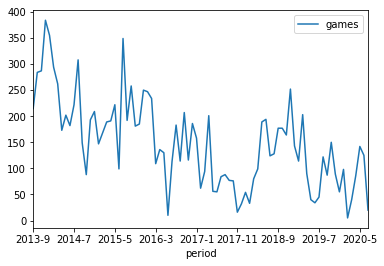

In [6]:
# game mothly dynamic
dyn.set_index('period')[['games']].plot()

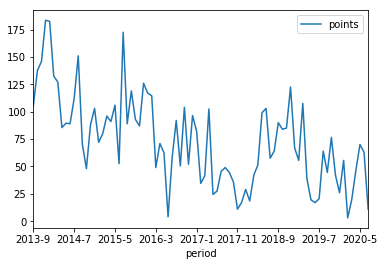

In [7]:
# score mothly dynamic
dyn.set_index('period')[['points']].plot()

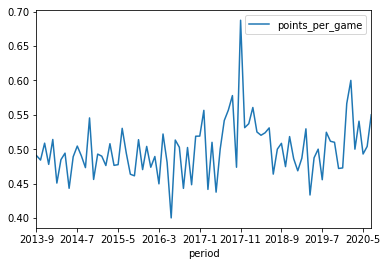

In [8]:
# effectivity mothly dynamic
dyn.set_index('period')[['points_per_game']].plot()

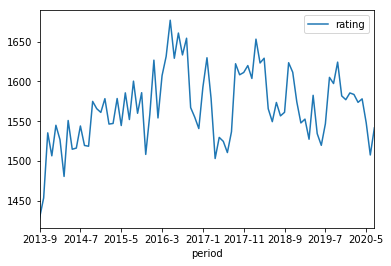

In [9]:
# rating dynamic
dyn.set_index('period')[['rating']].plot()

In [10]:
# effectivity grouped by colors
get_data("""

SELECT color
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by color
""".format(
    user=current_user
))

,color,games,points,points_per_game,rating
0,b,6189,3008.0,0.486024,1557.411860
1,w,6192,3107.5,0.501857,1557.398417


In [11]:
# different game settings
get_data("""
SELECT rules, rated, time_class, time_control
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by rules, rated, time_class, time_control
order by count(distinct game_url) desc

""".format(
    user=current_user
))

,rules,rated,time_class,time_control,games,points,points_per_game,rating
0,chess,True,blitz,300,7302,3564.5,0.488154,1550.874281
1,chess,True,blitz,180+2,4784,2411.5,0.504076,1571.176839
2,chess,True,blitz,600,143,75.5,0.527972,1455.440559
3,chess,False,blitz,600,29,9.0,0.310345,1540.620690
4,chess,False,blitz,180+2,26,7.5,0.288462,1562.423077
5,chess,True,bullet,120+1,17,10.5,0.617647,1503.705882
6,chess960,True,blitz,180,13,7.0,0.538462,1485.461538
7,chess,False,blitz,300+3,10,2.0,0.200000,1652.000000
8,chess,True,blitz,300+2,9,3.5,0.388889,1390.555556
9,chess,True,blitz,180,8,5.5,0.687500,1578.125000


In [12]:
# game end reasons
get_data("""
select *
        , round((games/sum(games) over (partition by score)),2) as share
from 
(
    SELECT score, result_reason, opponent_result_reason
            , count(distinct game_url) games
            , cast(avg(rating) as float) rating
    FROM chesscom_players
    where target_user='{user}'
    and datime>='2000-01-01'
    group by score, result_reason, opponent_result_reason
) t1 
order by score, games desc

""".format(
    user=current_user
))

,score,result_reason,opponent_result_reason,games,rating,share
0,0.0,resigned,win,3924,1554.124108,0.67
1,0.0,checkmated,win,1490,1548.420134,0.26
2,0.0,timeout,win,363,1560.022039,0.06
3,0.0,abandoned,win,60,1562.283333,0.01
4,0.5,insufficient,insufficient,336,1554.580357,0.39
5,0.5,repetition,repetition,229,1559.314410,0.27
6,0.5,agreed,agreed,188,1564.750000,0.22
7,0.5,stalemate,stalemate,84,1551.261905,0.10
8,0.5,timevsinsufficient,timevsinsufficient,16,1659.000000,0.02
9,0.5,50move,50move,4,1559.750000,0.00


In [13]:
# ratings clusters
rdif=get_data("""

    SELECT rating, opponent_rating
            , rating-opponent_rating different
            , count(distinct game_url) games
            , sum(score) points
            , sum(score)/count(distinct game_url) points_per_game
    FROM chesscom_players
    where target_user='{user}'
    and datime>='2000-01-01'
    group by rating, opponent_rating
    order by different
    


""".format(
    user=current_user
))

In [14]:
rdif['cluster']=1000*np.round(rdif['different']/1000,2)

In [15]:
rdif[0:3]

,rating,opponent_rating,different,games,points,points_per_game,cluster
0,1538,2283,-745,7,0.0,0.0,-740.0
1,1564,2288,-724,1,0.0,0.0,-720.0
2,1599,2252,-653,2,0.0,0.0,-650.0


In [16]:
glst=rdif.groupby('cluster').sum()
glst['points_per_game']=glst['points']/glst['games']

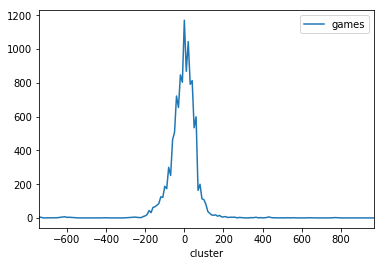

In [17]:
glst[['games']].plot()

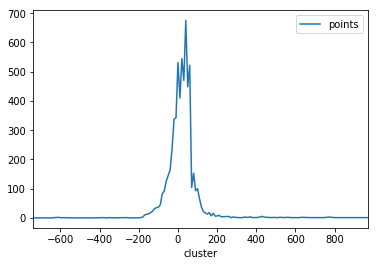

In [18]:
glst[['points']].plot()

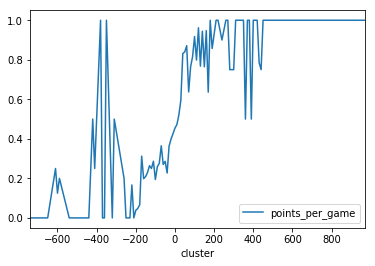

In [19]:
glst[['points_per_game']].plot()

In [20]:
# game starting distrib 
get_data("""
SELECT color, eco, eco_url
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by color, eco, eco_url
having count(distinct game_url)>30
order by count(distinct game_url) desc

""".format(
    user=current_user
))

,color,eco,eco_url,games,points,points_per_game,rating
0,w,D10,https://www.chess.com/openings/Slav-Defense-3.Nc3,472,244.0,0.516949,1559.031780
1,b,B10,https://www.chess.com/openings/Caro-Kann-Defense-2.Nf3-d5,471,253.5,0.538217,1549.027601
2,w,D20,https://www.chess.com/openings/Queens-Gambit-Accepted-Old-Variation,390,234.5,0.601282,1544.661538
3,w,D30,https://www.chess.com/openings/Queens-Gambit-Declined,310,149.5,0.482258,1562.180645
4,b,A45,https://www.chess.com/openings/Indian-Game,294,133.0,0.452381,1555.840136
5,b,B10,https://www.chess.com/openings/Caro-Kann-Defense,214,102.0,0.476636,1549.598131
6,b,C00,https://www.chess.com/openings/French-Defense-Knight-Variation-2...d5,209,107.0,0.511962,1566.899522
7,w,D31,https://www.chess.com/openings/Queens-Gambit-Declined-Semi-Slav-Defense-Accelerated-Move-Order,152,69.5,0.457237,1559.348684
8,w,D30,https://www.chess.com/openings/Queens-Gambit-Declined-3.Nf3-Nf6,134,65.5,0.488806,1562.149254
9,w,D35,https://www.chess.com/openings/Queens-Gambit-Declined-Queens-Knight-Variation-3...Nf6,122,68.5,0.561475,1554.795082


In [21]:
# effectivity grouped by start hour
hours=get_data("""

SELECT date_part('hour', datime) h
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by date_part('hour', datime)
order by date_part('hour', datime)
""".format(
    user=current_user
))

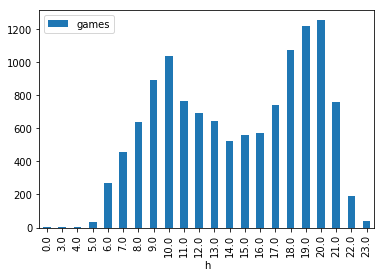

In [22]:
hours.set_index('h')[['games']].plot(kind='bar')

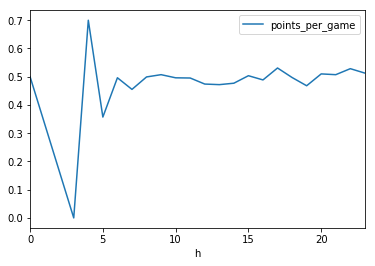

In [23]:
hours.set_index('h')[['points_per_game']].plot()

## Feachure generation

In [24]:
# main dataset
# with sessions
df=get_data("""

            SELECT *
            FROM chesscom_players
            where 
            datime>='2000-01-01'
            and rules='chess' and rated='True'
            and target_user='{user}'

""".format(
    user=current_user
))
df=df.sort_values(by=['datime'])
df['gamenum']=df.index

df['datime'] = df['datime'].astype('datetime64[ns]')
df['year']=df['datime'].dt.year
df['month']=df['datime'].dt.month
df['week']=df['datime'].dt.week
df['day']=df['datime'].dt.day
df['weekday']=df['datime'].dt.weekday
df['hour']=df['datime'].dt.hour
df['weekend']=np.where((df['weekday']==6)|(df['weekday']==0),1,0)
df['is_night']=np.where((df['hour']>1)&(df['hour']<9),1,0)

In [25]:
len(df)

12281

In [26]:
df.sample(3)

,index,target_user,opponent,datime,event,rules,time_class,time_control,rated,result,score,result_reason,opponent_result_reason,color,rating,opponent_rating,base_elo_forec,eco,game_url,eco_url,inserted_at,gamenum,year,month,week,day,weekday,hour,weekend,is_night
7873,0,Rosolimo,Bokadav,2016-12-13 11:16:00,Live Chess,chess,blitz,180+2,True,0-1,1.0,win,resigned,b,1570,1474,0.634743,B10,https://www.chess.com/live/game/1851595632,https://www.chess.com/openings/Caro-Kann-Defense-2.Nc3-d5,2020-07-19 10:19:21.050396,7873,2016,12,50,13,1,11,0,0
4697,0,Rosolimo,perre,2015-05-22 11:32:29,Live Chess,chess,blitz,300,True,1/2-1/2,0.5,agreed,agreed,w,1538,1542,0.494244,D07,https://www.chess.com/live/game/1160272241,https://www.chess.com/openings/Queens-Gambit-Declined-Chigorin-Defense-3.Nc3-dxc4,2020-07-19 10:17:33.984926,4697,2015,5,21,22,4,11,0,0
11263,0,Rosolimo,naveen_deswal,2019-07-20 10:01:10,Live Chess,chess,blitz,180+2,True,1-0,1.0,win,timeout,w,1570,1489,0.614501,E00,https://www.chess.com/live/game/3878844343,https://www.chess.com/openings/Indian-Game-East-Indian-Defense,2020-07-19 10:21:07.332001,11263,2019,7,29,20,5,10,0,0


In [27]:
wy=df.groupby('weekday').agg(
                {
                    'game_url': lambda x: x.nunique(),
                    'score': np.sum,
                    'rating':  np.mean,
                    'opponent_rating': np.mean,
                }).reset_index().sort_values(by='weekday', ascending=True)
wy['points_per_game']=wy['score']/wy['game_url']

In [28]:
wy

,weekday,game_url,rating,opponent_rating,score,points_per_game
0,0,1470,1556.644218,1559.931293,712.0,0.484354
1,1,1473,1554.040054,1560.718941,724.0,0.491514
2,2,1595,1559.290282,1561.549216,797.0,0.499687
3,3,1615,1552.144272,1560.552322,774.0,0.479257
4,4,1846,1556.914951,1561.281690,892.0,0.483207
5,5,2330,1560.687124,1561.249356,1184.0,0.508155
6,6,1952,1560.109119,1561.163934,995.5,0.509990


In [29]:
wey=df.groupby('weekend').agg(
                {
                    'game_url': lambda x: x.nunique(),
                    'score': np.sum,
                    'rating':  np.mean,
                    'opponent_rating': np.mean,
                }).reset_index().sort_values(by='weekend', ascending=True)
wey['points_per_game']=wey['score']/wey['game_url']

In [30]:
wey

,weekend,game_url,rating,opponent_rating,score,points_per_game
0,0,8859,1556.987019,1561.094819,4371.0,0.493397
1,1,3422,1558.620690,1560.634424,1707.5,0.498977


In [31]:
ni=df.groupby('is_night').agg(
                {
                    'game_url': lambda x: x.nunique(),
                    'score': np.sum,
                    'rating': np.mean,
                    'opponent_rating': np.mean,
                }).reset_index().sort_values(by='is_night', ascending=True)
ni['points_per_game']=ni['score']/ni['game_url']

In [32]:
ni

,is_night,game_url,rating,opponent_rating,score,points_per_game
0,0,10876,1557.180121,1560.034204,5400.5,0.496552
1,1,1405,1559.471174,1568.183630,678.0,0.482562


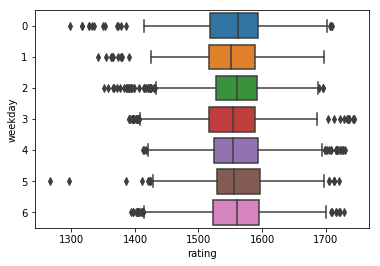

In [33]:
sns.boxplot(y="weekday", x="rating", data=df, orient="h")

In [34]:
# elo-functions
def elo_prob(ra, rb):
    return 1/(1+np.power(10, (rb-ra)/400))

def own_elo(ra, rb, score, K):
    return ra+K*(score-elo_prob(ra, rb))

# elo logic chesking
df['own_elo']=1200
df['K']=np.where(df['gamenum']<30,30,5)
df['own_elo']=np.round(df[['rating', 'opponent_rating', 'score', 'K']].apply(lambda x: own_elo(*x), axis=1),0)

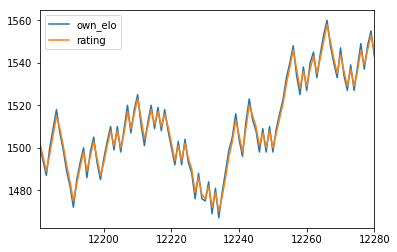

In [35]:
df[['own_elo', 'rating']][-100:].plot()

In [36]:
# intransigence rate - rate of draws in last 1000 games
ir=get_data("""

select target_user, round(irate,2) intransigence_rate
from 
(
    select target_user, is_draw
            , count(distinct game_url) games
            , count(distinct game_url)/sum(count(distinct game_url)) over (partition by target_user) irate
    from
    (
        SELECT *
                , case
                    when score=0.5 then 1
                    else 0
                 end is_draw
                , row_number() over (partition by target_user order by datime desc) part_num
        FROM chesscom_players
        where 
        datime>='2000-01-01'
        and rules='chess' and rated='True'
    ) t1
    where part_num<=1000
    group by target_user, is_draw
) t2
where is_draw=1
order by 2 desc


""".format(
    user=current_user
))

In [37]:
ir.sample(3)

,target_user,intransigence_rate
3,Andersooo,0.06
16,vipinv90,0.02
13,alien_sdl,0.03


In [38]:
# как часто роняют флаг
# intransigence rate - rate of draws in last 1000 games
clockers=get_data("""

select target_user, round(irate,2) clocker_rate
from 
(
    select target_user, is_draw
            , count(distinct game_url) games
            , count(distinct game_url)/sum(count(distinct game_url)) over (partition by target_user) irate
    from
    (
        SELECT *
                , case
                    when result_reason='timeout' then 1
                    else 0
                 end is_draw
                , row_number() over (partition by target_user order by datime desc) part_num
        FROM chesscom_players
        where 
        datime>='2000-01-01'
        and rules='chess' and rated='True'
    ) t1
    where part_num<=1000
    group by target_user, is_draw
) t2
where is_draw=1
order by 2 desc


""".format(
    user=current_user
))

In [39]:
# как часто роняют флаг
# intransigence rate - rate of draws in last 1000 games
opp_clockers=get_data("""

select target_user, round(irate,2) opponent_clocker_rate
from 
(
    select target_user, is_draw
            , count(distinct game_url) games
            , count(distinct game_url)/sum(count(distinct game_url)) over (partition by target_user) irate
    from
    (
        SELECT *
                , case
                    when opponent_result_reason='timeout' then 1
                    else 0
                 end is_draw
                , row_number() over (partition by target_user order by datime desc) part_num
        FROM chesscom_players
        where 
        datime>='2000-01-01'
        and rules='chess' and rated='True'
    ) t1
    where part_num<=1000
    group by target_user, is_draw
) t2
where is_draw=1
order by 2 desc


""".format(
    user=current_user
))

In [40]:
# номер партии в сессии
sessions=get_data("""

select *
        , row_number() over (partition by session_id order by datime) game_ss_number
from 
(
    select *
            , concat(cast(target_user as text), 
                    '-', 
                    cast(sum(is_new_session) over (partition by target_user order by datime) as text)) session_id
    from
    (
            SELECT *
                    , row_number() over (partition by target_user order by datime) part_num
                    , lag(datime) over (partition by target_user order by datime) last_game
                    , date_part('minute', 
                        (datime-lag(datime) over (partition by target_user order by datime))) form_last_game
                    , case
                        when date_part('minute', 
                        (datime-lag(datime) over (partition by target_user order by datime)))>30 then 1
                        else 0
                      end is_new_session
            FROM chesscom_players
            where 
            datime>='2000-01-01'
            and rules='chess' and rated='True'
            and target_user='{user}'
    ) t1
) t2      
        

""".format(
    user=current_user
))

In [41]:
sessions[0:3]

,index,target_user,opponent,datime,event,rules,time_class,time_control,rated,result,score,result_reason,opponent_result_reason,color,rating,opponent_rating,base_elo_forec,eco,game_url,eco_url,inserted_at,part_num,last_game,form_last_game,is_new_session,session_id,game_ss_number
0,0,Rosolimo,mdshafiullah,2013-09-16 10:14:36,Live Chess,chess,blitz,300+2,True,0-1,0.0,checkmated,win,w,1378,1478,0.359935,A43,https://www.chess.com/live/game/601973474,https://www.chess.com/openings/Queens-Pawn-Opening-Benoni-Defense,2020-07-19 10:15:13.949415,1,NaT,NaN,0,Rosolimo-0,1
1,0,Rosolimo,arielpoten,2013-09-16 10:27:01,Live Chess,chess,blitz,300+2,True,1/2-1/2,0.5,stalemate,stalemate,w,1374,1336,0.554469,A40,https://www.chess.com/live/game/601978967,https://www.chess.com/openings/Modern-Defense-with-1-d4-2.c4-Bg7-3.Nc3,2020-07-19 10:15:13.949415,2,2013-09-16 10:14:36,12.0,0,Rosolimo-0,2
2,0,Rosolimo,cateagle,2013-09-16 10:39:59,Live Chess,chess,blitz,300+2,True,1-0,0.0,resigned,win,b,1350,1442,0.370611,C10,https://www.chess.com/live/game/601984862,https://www.chess.com/openings/French-Defense-Rubinstein-Variation-4.Nxe4,2020-07-19 10:15:13.949415,3,2013-09-16 10:27:01,12.0,0,Rosolimo-0,3


In [42]:
ss=sessions.groupby('game_ss_number').agg(
                {
                    'game_url': lambda x: x.nunique(),
                    'score': np.sum,
                    'rating':  np.mean,
                    'opponent_rating': np.mean,
                }).reset_index().sort_values(by='game_ss_number', ascending=True)
ss['points_per_game']=ss['score']/ss['game_url']

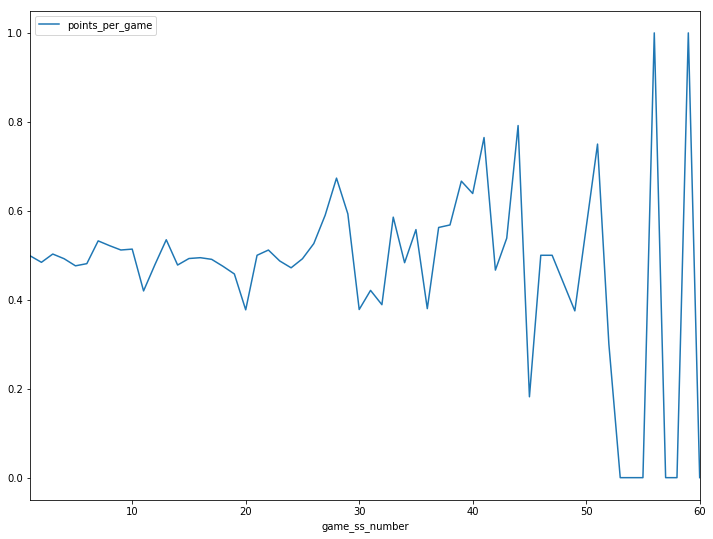

In [43]:
# ss.set_index('game_ss_number')[['points_per_game']].plot(kind='barh', figsize=(12,9)).invert_yaxis()
ss.set_index('game_ss_number')[['points_per_game']].plot(figsize=(12,9))

In [44]:
# личные встречи
per_met=get_data("""


            SELECT target_user, opponent
                    , sum(score)/count(distinct game_url) points_per_game
            FROM chesscom_players
            where 
            datime>='2000-01-01'
            and rules='chess' and rated='True'
            and target_user='{user}'
            
            group by target_user, opponent
            having count(distinct game_url)>1


""".format(
    user=current_user
))

In [45]:
per_met.sample(3)

,target_user,opponent,points_per_game
222,Rosolimo,baktashsam,0.500000
1465,Rosolimo,quick_assay,0.666667
1691,Rosolimo,spassski,0.500000


In [46]:
len(per_met)

1993

In [117]:
# and all n onw df
res=get_data("""


WITH 
main_ss AS
(
    SELECT *
            , row_number() over (partition by target_user order by datime) game_number
            , lag(datime) over (partition by target_user order by datime) last_game_at
            , date_part('minute', 
                (datime-lag(datime) over (partition by target_user order by datime))) minutes_from_last_game
            , case
                when date_part('minute', 
                (datime-lag(datime) over (partition by target_user order by datime)))>30 then 1
                else 0
              end is_new_session
            , row_number() over (partition by game_url order by datime) game_id
    FROM chesscom_players
    where 
    datime>='2000-01-01'
    and rules='chess' and rated='True'
    and target_user='{user}'
), 
sesson_id_tbl AS
(
    select *
            , concat(cast(target_user as text), 
                    '-', 
                    cast(sum(is_new_session) over (partition by target_user order by datime) as text)) session_id
    from main_ss
),
main AS
(
    select *
        , row_number() over (partition by session_id order by datime) game_ss_number
    from sesson_id_tbl
),
ir AS
(
    select target_user, cast(irate as float) intransigence_rate
    from 
    (
        select target_user, is_draw
                , count(distinct game_url) games
                , count(distinct game_url)/sum(count(distinct game_url)) over (partition by target_user) irate
        from
        (
            SELECT *
                    , case
                        when score=0.5 then 1
                        else 0
                     end is_draw
                    , row_number() over (partition by target_user order by datime desc) part_num
            FROM main
        ) t1
        where part_num<=1000
        group by target_user, is_draw
    ) t2
    where is_draw=1
),
clockers AS
(
    select target_user, cast(irate as float) clocker_rate
    from 
    (
        select target_user, is_draw
                , count(distinct game_url) games
                , count(distinct game_url)/sum(count(distinct game_url)) over (partition by target_user) irate
        from
        (
            SELECT *
                    , case
                        when result_reason='timeout' then 1
                        else 0
                     end is_draw
                    , row_number() over (partition by target_user order by datime desc) part_num
            FROM main
        ) t1
        where part_num<=1000
        group by target_user, is_draw
    ) t2
    where is_draw=1
), 
op_clockers AS
(
    select target_user, cast(irate as float) opponent_clocker_rate
    from 
    (
        select target_user, is_draw
                , count(distinct game_url) games
                , count(distinct game_url)/sum(count(distinct game_url)) over (partition by target_user) irate
        from
        (
            SELECT *
                    , case
                        when opponent_result_reason='timeout' then 1
                        else 0
                     end is_draw
                    , row_number() over (partition by target_user order by datime desc) part_num
            FROM main
        ) t1
        where part_num<=1000
        group by target_user, is_draw
    ) t2
    where is_draw=1
),
per_meet AS
(
    SELECT target_user, opponent
            , sum(score)/count(distinct game_url) points_per_game
    FROM chesscom_players
    where 
    datime>='2000-01-01'
    and rules='chess' and rated='True'
    and target_user='{user}'
    group by target_user, opponent
)

select m.*
        , ir1.intransigence_rate
        , ir2.intransigence_rate opponent_intransigence_rate
        , c1.clocker_rate
        , c2.clocker_rate opponent_clocker_rate
        , oc1.opponent_clocker_rate target_opponent_clocker_rate
        , oc2.opponent_clocker_rate opponent_opponent_clocker_rate
        , pm.points_per_game personal_meets_stat 
        , case 
            when date_part('dow', datime) in (0, 6) then 1
            else 0
        end is_weekend
        , case 
            when date_part('hour', datime)>=1 and  date_part('hour', datime)<8 then 1
            else 0
        end is_night
from main m
left outer join ir ir1 ON
    ir1.target_user=m.target_user
left outer join ir ir2 ON
    ir2.target_user=m.opponent
left outer join clockers c1 ON
    c1.target_user=m.target_user
left outer join clockers c2 ON
    c2.target_user=m.opponent
left outer join op_clockers oc1 ON
    oc1.target_user=m.target_user
left outer join op_clockers oc2 ON
    oc2.target_user=m.opponent    
left outer join per_meet pm ON
    pm.target_user=m.target_user AND   
    pm.opponent=m.opponent
    
    
--limit 5

""".format(
    user=current_user
))

In [118]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12281 entries, 0 to 12280
Data columns (total 37 columns):
index                             12281 non-null int64
target_user                       12281 non-null object
opponent                          12281 non-null object
datime                            12281 non-null datetime64[ns]
event                             12281 non-null object
rules                             12281 non-null object
time_class                        12281 non-null object
time_control                      12281 non-null object
rated                             12281 non-null bool
result                            12281 non-null object
score                             12281 non-null float64
result_reason                     12281 non-null object
opponent_result_reason            12281 non-null object
color                             12281 non-null object
rating                            12281 non-null int64
opponent_rating                   12281 non-nu

In [119]:
len(res)

12281

In [120]:
res.sample(3)

,index,target_user,opponent,datime,event,rules,time_class,time_control,rated,result,score,result_reason,opponent_result_reason,color,rating,opponent_rating,base_elo_forec,eco,game_url,eco_url,inserted_at,game_number,last_game_at,minutes_from_last_game,is_new_session,game_id,session_id,game_ss_number,intransigence_rate,opponent_intransigence_rate,clocker_rate,opponent_clocker_rate,target_opponent_clocker_rate,opponent_opponent_clocker_rate,personal_meets_stat,is_weekend,is_night
7478,0,Rosolimo,Sqeckle,2015-07-04 11:12:41,Live Chess,chess,blitz,300,True,0-1,0.0,resigned,win,w,1517,1539,0.468382,D10,https://www.chess.com/live/game/1204937911,https://www.chess.com/openings/Slav-Defense-3.Nc3,2020-07-19 10:17:46.548884,4837,2015-07-04 11:03:55,8.0,0,1,Rosolimo-478,5,0.075,None,0.008,None,0.13,None,0.0,1,0
4992,0,Rosolimo,vassekin,2014-07-20 14:35:24,Live Chess,chess,blitz,300,True,1-0,1.0,win,resigned,w,1568,1570,0.497122,A11,https://www.chess.com/live/game/865234602,https://www.chess.com/openings/English-Opening-Caro-Kann-Defensive-System-2.Nf3-d5,2020-07-19 10:16:32.970703,2754,2014-07-20 12:15:00,20.0,0,1,Rosolimo-225,26,0.075,None,0.008,None,0.13,None,1.0,1,0
6239,0,Rosolimo,lmaisaia,2015-01-05 20:34:51,Live Chess,chess,blitz,300,True,0-1,0.0,resigned,win,w,1592,1629,0.446953,A13,https://www.chess.com/live/game/1020569979,https://www.chess.com/openings/English-Opening-Agincourt-Defense,2020-07-19 10:17:09.060367,3801,2015-01-05 20:26:58,7.0,0,1,Rosolimo-347,3,0.075,None,0.008,None,0.13,None,0.0,0,0


In [121]:
# insert data in sql table
def insert_df(df, table_name):
    import datetime 
    now=datetime.datetime.now() 
    df['inserted_at']=now
    
    postgresql_engine=get_engine()
    
    df.to_sql(table_name, con=postgresql_engine, if_exists='append')#, index_label='index')    
    print('Ready: ', len(df), ' rows inserted')   

In [122]:
insert_df(res, 'chesscom_dataset')

('Ready: ', 12281, ' rows inserted')


In [116]:
get_data("""

--drop table chesscom_dataset



""")

""
